In [1]:
import pandas as pd

In [54]:
df_jan = pd.read_parquet('../data/fhv_tripdata_2021-01.parquet')
df_feb = pd.read_parquet('../data/fhv_tripdata_2021-02.parquet')

In [6]:
print(df_jan.shape)
print(df_feb.shape)

(1154112, 7)
(1037692, 7)


In [7]:
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[ns]
 2   dropOff_datetime        1154112 non-null  datetime64[ns]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 61.6+ MB


In [16]:
df_jan['duration'] = (df_jan['dropOff_datetime'] - df_jan['pickup_datetime']).dt.total_seconds() / 60

In [17]:
df_jan['duration'].mean()

19.1672240937939

<AxesSubplot:>

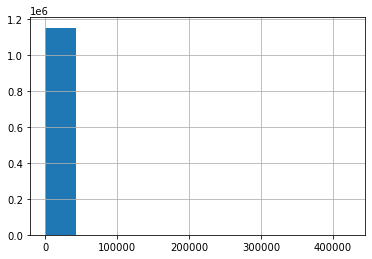

In [18]:
df_jan['duration'].hist()

In [19]:
df_jan = df_jan.loc[(df_jan['duration'] >= 1) & \
    (df_jan['duration'] <= 60)].reset_index(drop = True)
df_jan.shape

(1109826, 8)

In [20]:
df_jan.isnull().sum() / len(df_jan)

dispatching_base_num      0.000000
pickup_datetime           0.000000
dropOff_datetime          0.000000
PUlocationID              0.835273
DOlocationID              0.133270
SR_Flag                   1.000000
Affiliated_base_number    0.000697
duration                  0.000000
dtype: float64

In [21]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].fillna(-1)
df_jan['DOlocationID'] = df_jan['DOlocationID'].fillna(-1)

In [26]:
df_jan['PUlocationID'] = df_jan['PUlocationID'].astype(str)

In [28]:
df_jan['DOlocationID'] = df_jan['DOlocationID'].astype(str)

In [33]:
train = pd.concat([df_jan[['duration']], pd.get_dummies(df_jan[['PUlocationID', 'DOlocationID']])], axis = 1)

In [34]:
train.shape

(1109826, 526)

In [35]:
train.head()

,duration,PUlocationID_-1.0,PUlocationID_1.0,PUlocationID_10.0,PUlocationID_100.0,PUlocationID_101.0,PUlocationID_102.0,PUlocationID_106.0,PUlocationID_107.0,PUlocationID_108.0,...,DOlocationID_90.0,DOlocationID_91.0,DOlocationID_92.0,DOlocationID_93.0,DOlocationID_94.0,DOlocationID_95.0,DOlocationID_96.0,DOlocationID_97.0,DOlocationID_98.0,DOlocationID_99.0
0,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17.000000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.283333,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.216667,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.050000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(train.drop('duration', axis = 1), train['duration'])

LinearRegression()

In [39]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [40]:
train_preds = model.predict(train.drop('duration', axis = 1))

In [41]:
mean_absolute_percentage_error(train['duration'], train_preds)

89.00272805339316

In [55]:
df_feb['PUlocationID'] = df_feb['PUlocationID'].fillna(-1)
df_feb['DOlocationID'] = df_feb['DOlocationID'].fillna(-1)

In [56]:
df_feb['DOlocationID'] = df_feb['DOlocationID'].astype(str)
df_feb['PUlocationID'] = df_feb['PUlocationID'].astype(str)

In [57]:
df_feb['duration'] = (df_feb['dropOff_datetime'] - df_feb['pickup_datetime']).dt.total_seconds() / 60

In [58]:
test = pd.concat([df_feb[['duration']], pd.get_dummies(df_feb[['PUlocationID', 'DOlocationID']])], axis = 1)

In [59]:
test_preds = model.predict(test[train.columns].drop('duration', axis = 1))
mean_absolute_percentage_error(test['duration'], test_preds)

1654040.291291404